方針\
$X$エラーについては、$p=[5\times10^{-2},10^{-1}]$を補完して、$p=10^{-4},5\times10^{-4}$を求める。
その後、符合距離の関数として求め直す。
$Z$エラーについては、$p=10^{-4},5\times10^{-4}$から、符合距離の関数として求め直す。

# d1 = 5

In [24]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import os
import matplotlib.ticker as ptick

### Xエラー

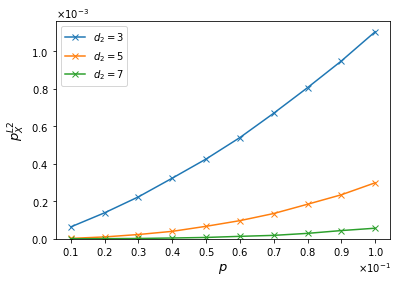

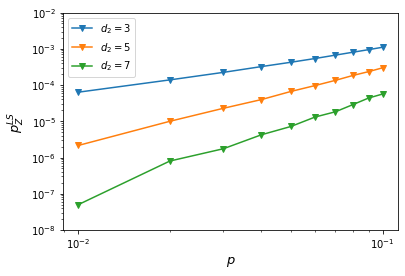

In [25]:
# FUjii-labのパス
path = "/Users/konohideki/Documents/Fujii-lab/surface_realistic/realistic_single_round/SWAP/d1=5,eta=1000"
# ファイル名
file2 = "X error,d2=(3,7,2),eta=1000,trials=20000000,ver0" + ".csv"
########################################

# csvファイルの読み込み
os.chdir(path)
data2 = pd.read_csv(file2, index_col=0)
data2 = data2.iloc[:,:]
# データフレームの行名(リスト)を取得
code_distance_list = data2.index
# データフレームの列名(リスト)を取得
p_list = data2.columns
##### グラフ作成 #####

a = np.array(p_list)
a = [float(num) for num in a]
a = np.array(a)

fig, ax = plt.subplots()
for i in range(len(code_distance_list)):
    b = np.array(data2.loc[code_distance_list[i]])
    ax.plot(a, b,marker='x',label=r"$d_{2}=$"+str(code_distance_list[i]))
ax.set_xlabel(r"$p$", fontsize=13)
ax.set_ylabel(r'$p_X^{L2}$', fontsize=13)
ax.set_ylim(0,)
ax.xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="x",scilimits=(0,0))
ax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
ax.set_xticks(a)
ax.legend()

fig, ax = plt.subplots()
for i in range(len(code_distance_list)):
    b = np.array(data2.loc[code_distance_list[i]])
    ax.plot(a, b,marker='v',label=r"$d_{2}=$"+str(code_distance_list[i]))
ax.set_xlabel(r"$p$", fontsize=13)
ax.set_ylabel(r'$p_Z^{LS}$', fontsize=13)
ax.set_ylim(0,)
ax.set_xticks(a)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylim(0.00000001, 0.01)
ax.legend()

### 線形回帰

p(10^{-4})= [1.92295124e-07 1.21599558e-10 9.18349019e-14]
p(5*10^{-4})= [1.42716447e-06 3.72937024e-09 1.03291819e-11]


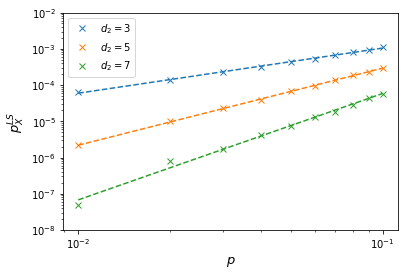

In [26]:
from sklearn import linear_model
clf = linear_model.LinearRegression()
os.chdir(path)
data2 = pd.read_csv(file2, index_col=0)

p_10_4 = np.array([])
p_5_10_4 = np.array([])

p_list = []
cm = plt.get_cmap("tab10")
fig, ax = plt.subplots()
for i in range(len(code_distance_list)):
    if i != 2:
        b = np.array(data2.loc[code_distance_list[i]])
        X = np.log10(a).reshape(-1, 1)
        Y = np.log10(b)
        clf.fit(X, Y)
        p_10_4=np.append(p_10_4,10**clf.predict([[-4]]))
        p_5_10_4=np.append(p_5_10_4,10**clf.predict([[-4+np.log10(5)]]))
        ax.plot(a, b,marker='x',label=r"$d_{2}=$"+str(code_distance_list[i]),linewidth=0)
        ax.plot(a, 10**clf.predict(np.log10(a).reshape(-1, 1)),marker='',color=cm(i),linestyle="dashed")
    if i == 2:
        b = np.array(data2.loc[code_distance_list[i]])
        X = np.log10(a).reshape(-1, 1)
        Y = np.log10(b)
        clf.fit(X, Y)
        p_10_4=np.append(p_10_4,10**clf.predict([[-4]]))
        p_5_10_4=np.append(p_5_10_4,10**clf.predict([[-4+np.log10(5)]]))
        ax.plot(a, b,marker='x',label=r"$d_{2}=$"+str(code_distance_list[i]),linewidth=0)
        ax.plot(a, 10**clf.predict(np.log10(a).reshape(-1, 1)),marker='',color=cm(i),linestyle="dashed")
#print(a,10**clf.predict(a.reshape(-1, 1)))
ax.set_xlabel(r"$p$", fontsize=13)
ax.set_ylabel(r'$p_X^{LS}$', fontsize=13)
ax.set_ylim(0,)
ax.xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="x",scilimits=(0,0))
ax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
ax.set_xticks(a)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylim(0.00000001, 0.01)
ax.legend()

print("p(10^{-4})=", p_10_4)
print("p(5*10^{-4})=", p_5_10_4)

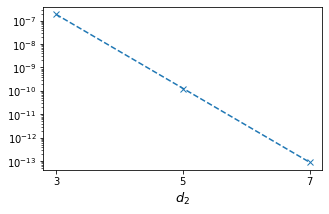

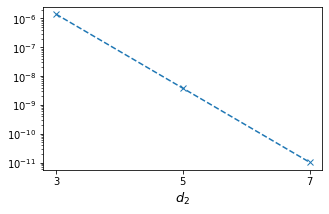

In [27]:
# p=10^{-4}
fig, ax = plt.subplots(figsize=(5, 3))
# fitting
clf = linear_model.LinearRegression()
X = np.array([3,5,7]).reshape(-1, 1)
Y = np.log10(p_10_4)
clf.fit(X, Y)
predict_p = clf.predict([[3],[7]]) 
# モデルの決定
a_x1 = clf.coef_
b_x1 = clf.intercept_
def pL_X_5_1(code_distance):
    return 10**(a_x1*code_distance+b_x1)
ax.set_xlabel(r"$d_2$", fontsize=13)
#ax.set_ylabel(r'$p_X^{LS}$', fontsize=13)
ax.set_xticks([3,5,7])
ax.plot([3,5,7], p_10_4,marker='x',linewidth=0,color=cm(0))
ax.plot([3,7],10**predict_p,marker='',linestyle="dashed",color=cm(0))
ax.set_yscale("log")

# p=5*10^{-4}
# p=10^{-4}
fig, ax = plt.subplots(figsize=(5, 3))
# fitting
clf = linear_model.LinearRegression()
X = np.array([3,5,7]).reshape(-1, 1)
Y = np.log10(p_5_10_4)
clf.fit(X, Y)
predict_p = clf.predict([[3],[7]]) 
# モデルの決定
a_x5 = clf.coef_
b_x5 = clf.intercept_
def pL_X_5_5(code_distance):
    return 10**(a_x5*code_distance+b_x5)
ax.set_xlabel(r"$d_2$", fontsize=13)
#ax.set_ylabel(r'$p_X^{LS}$', fontsize=13)
ax.set_xticks([3,5,7])
ax.plot([3,7],10**predict_p,marker='',linestyle="dashed",color=cm(0))
ax.plot([3,5,7], p_5_10_4,marker='x',label=r"$d_{2}=$"+str(code_distance_list[i]),linewidth=0,color=cm(0))
ax.set_yscale("log")

### Zエラー

In [28]:
# FUjii-labのパス
path = "/Users/konohideki/Documents/Fujii-lab/surface_realistic/realistic_single_round/SWAP/d1=5,N=1,eta=1000"
# ファイル名
file2 = "Z error,N=1,d2=(3,7,2),eta=1000,trials=400000,ver0" + ".csv"
########################################

# csvファイルの読み込み
os.chdir(path)
data2 = pd.read_csv(file2, index_col=0)

# データフレームの行名(リスト)を取得
code_distance_list = data2.index

# データフレームの列名(リスト)を取得
p_list = data2.columns

##### グラフ作成 #####

a = np.array(p_list)
a = [float(num) for num in a]
a = np.array(a)

"""
fig, ax = plt.subplots()
for i in range(len(code_distance_list)):
    b = np.array(data2.loc[code_distance_list[i]])
    ax.plot(a, b,marker='x',label=r"$d_{2}=$"+str(code_distance_list[i]))
ax.set_xlabel(r"$p$", fontsize=13)
ax.set_ylabel(r'$p_Z^{L(\rm{S})}$', fontsize=13)
ax.set_ylim(0,)
ax.xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="x",scilimits=(0,0))
ax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
ax.set_xticks(a)
ax.legend()

fig, ax = plt.subplots()
for i in range(len(code_distance_list)-1):
    b = np.array(data2.loc[code_distance_list[i]])
    ax.plot(a, b,marker='v',label=r"$d_{2}=$"+str(code_distance_list[i]))
    print(code_distance_list[i]*(4*5+6+7)/b[0])
ax.set_xlabel(r"$p$", fontsize=13)
ax.set_ylabel(r'$p_Z^{LS}$', fontsize=13)
ax.set_ylim(0,)
ax.xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="x",scilimits=(0,0))
ax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
ax.set_xticks(a)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylim(0.00001, 1)
ax.legend()
"""

'\nfig, ax = plt.subplots()\nfor i in range(len(code_distance_list)):\n    b = np.array(data2.loc[code_distance_list[i]])\n    ax.plot(a, b,marker=\'x\',label=r"$d_{2}=$"+str(code_distance_list[i]))\nax.set_xlabel(r"$p$", fontsize=13)\nax.set_ylabel(r\'$p_Z^{L(\rm{S})}$\', fontsize=13)\nax.set_ylim(0,)\nax.xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) \nax.ticklabel_format(style="sci",  axis="x",scilimits=(0,0))\nax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) \nax.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))\nax.set_xticks(a)\nax.legend()\n\nfig, ax = plt.subplots()\nfor i in range(len(code_distance_list)-1):\n    b = np.array(data2.loc[code_distance_list[i]])\n    ax.plot(a, b,marker=\'v\',label=r"$d_{2}=$"+str(code_distance_list[i]))\n    print(code_distance_list[i]*(4*5+6+7)/b[0])\nax.set_xlabel(r"$p$", fontsize=13)\nax.set_ylabel(r\'$p_Z^{LS}$\', fontsize=13)\nax.set_ylim(0,)\nax.xaxis.set_major_formatter(ptick.ScalarFormatter

hokan= [0.00172468]
hokan= [0.00018922]
hokan= [2.0532703e-05]
[0.0001 0.0002 0.0003 0.0004 0.0005 0.0006 0.0007 0.0008 0.0009 0.001 ] [6.11271222e+09 6.11780719e+09 6.12290641e+09 6.12800988e+09
 6.13311761e+09 6.13822959e+09 6.14334583e+09 6.14846634e+09
 6.15359111e+09 6.15872016e+09]


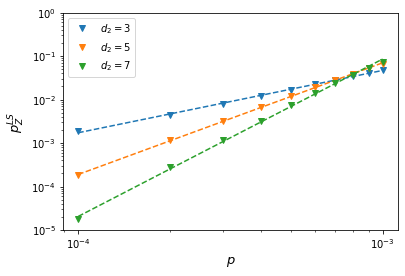

In [29]:
from sklearn import linear_model
clf = linear_model.LinearRegression()
os.chdir(path)
data2 = pd.read_csv(file2, index_col=0)

p_list = []
cm = plt.get_cmap("tab10")
fig, ax = plt.subplots()
for i in range(len(code_distance_list)-1):
    if i != 2:
        b = np.array(data2.loc[code_distance_list[i]])
        X = np.log10(a).reshape(-1, 1)
        Y = np.log10(b)
        clf.fit(X, Y)
        print("hokan=", 10**clf.predict([[-4]]))
        p_list.append(10**clf.predict([[-4]]))
        ax.plot(a, b,marker='v',label=r"$d_{2}=$"+str(code_distance_list[i]),linewidth=0)
        ax.plot(a, 10**clf.predict(np.log10(a).reshape(-1, 1)),marker='',color=cm(i),linestyle="dashed")
    if i == 2:
        b = np.array(data2.loc[code_distance_list[i]])
        X = np.log10(a).reshape(-1, 1)
        Y = np.log10(b)
        clf.fit(X, Y)
        print("hokan=", 10**clf.predict([[-4]]))
        p_list.append(10**clf.predict([[-4]]))
        ax.plot(a, b,marker='v',label=r"$d_{2}=$"+str(code_distance_list[i]),linewidth=0)
        ax.plot(a, 10**clf.predict(np.log10(a).reshape(-1, 1)),marker='',color=cm(i),linestyle="dashed")
print(a,10**clf.predict(a.reshape(-1, 1)))
ax.set_xlabel(r"$p$", fontsize=13)
ax.set_ylabel(r'$p_Z^{LS}$', fontsize=13)
ax.set_ylim(0,)
ax.xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="x",scilimits=(0,0))
ax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
ax.set_xticks(a)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylim(0.00001, 1)
ax.legend()

[-0.50949883]
0.06416163985765123
[-0.08551436]
0.030614489160086994


(0.007, 0.02)

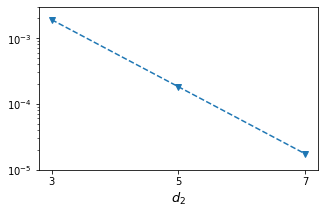

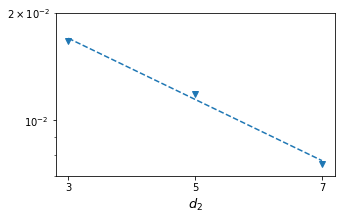

In [30]:
# p=10^{-4}
fig, ax = plt.subplots(figsize=(5, 3))
# fitting
clf = linear_model.LinearRegression()
X = np.array([3,5,7]).reshape(-1, 1)
Y = np.log10([data2.iloc[0,0],data2.iloc[1,0],data2.iloc[2,0]])
clf.fit(X, Y)
predict_p = clf.predict([[3],[7]]) 
# モデルの決定
a_z1 = clf.coef_
b_z1 = clf.intercept_
print(clf.coef_)
print(10**clf.intercept_)
def pL_Z_5_1(code_distance):
    return 10**(a_z1*code_distance+b_z1)
ax.set_xlabel(r"$d_2$", fontsize=13)
#ax.set_ylabel(r'$p_Z^{LS}$', fontsize=13)
ax.set_xticks([3,5,7])
ax.plot([3,5,7], [data2.iloc[0,0],data2.iloc[1,0],data2.iloc[2,0]],marker='v',linewidth=0,color=cm(0))
ax.plot([3,7],10**predict_p,marker='',linestyle="dashed",color=cm(0))
ax.set_ylim(0.00001,3*0.001)
ax.set_yscale("log")

# p=5*10^{-4}
# p=10^{-4}
fig, ax = plt.subplots(figsize=(5, 3))
# fitting
clf = linear_model.LinearRegression()
X = np.array([3,5,7]).reshape(-1, 1)
Y = np.log10([data2.iloc[0,4],data2.iloc[1,4],data2.iloc[2,4]])
clf.fit(X, Y)
predict_p = clf.predict([[3],[7]]) 
# モデルの決定
a_z5 = clf.coef_
b_z5 = clf.intercept_
print(clf.coef_)
print(10**clf.intercept_)
def pL_Z_5_5(code_distance):
    return 10**(a_z5*code_distance+b_z5)
ax.set_xlabel(r"$d_2$", fontsize=13)
#ax.set_ylabel(r'$p_Z^{LS}$', fontsize=13)
ax.set_xticks([3,5,7])
ax.plot([3,7],10**predict_p,marker='',linestyle="dashed",color=cm(0))
ax.plot([3,5,7], [data2.iloc[0,4],data2.iloc[1,4],data2.iloc[2,4]],marker='v',label=r"$d_{2}=$"+str(code_distance_list[i]),linewidth=0,color=cm(0))
ax.set_yscale("log")
ax.set_ylim(7*0.001,2*0.01)

寿命の計算

[4.17809527e+08 1.00764451e+12 2.04134134e+15 3.79787225e+18
 6.71692936e+21 1.14868699e+25 1.91791723e+28]
[4.10502339e+04 7.14762971e+05 1.04541262e+07 1.40420291e+08
 1.79298933e+09 2.21373703e+10 2.66852697e+11]


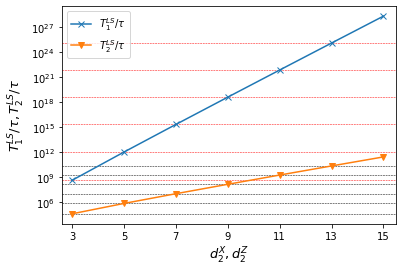

In [50]:
fig, ax = plt.subplots()
code_distance_list = np.array([3,5,7,9,11,13,15])
cm = plt.get_cmap("tab10")
print((4*5+6)*code_distance_list/pL_X_5_1(code_distance_list))
print((4*5+6)*code_distance_list/pL_Z_5_1(code_distance_list))
ax.plot(code_distance_list, (4*5+6)*code_distance_list /pL_X_5_1(code_distance_list),marker='x',label=r"$T^{LS}_1/\tau$")
ax.plot(code_distance_list, (4*5+6)*code_distance_list /pL_Z_5_1(code_distance_list),marker='v',label=r"$T^{LS}_2/\tau$")
for i in range(len(code_distance_list)-1):
    plt.hlines([(4*5+6)*code_distance_list[i] /pL_X_5_1(code_distance_list[i])[0]], 2, 22, "r", linestyles='dashed',linewidth=0.5)
    plt.hlines([(4*5+6)*code_distance_list[i] /pL_Z_5_1(code_distance_list[i])[0]], 2, 22, "k", linestyles='dashed',linewidth=0.5)
ax.set_xlabel(r"$d_2^X, d_2^Z$", fontsize=13)
ax.set_xlabel(r"$d_2^X, d_2^Z$", fontsize=13)
ax.set_ylabel(r'$T^{LS}_1/\tau, T^{LS}_2/\tau$', fontsize=13)
ax.set_xticks(code_distance_list)
ax.set_yscale("log")
ax.set_xlim(2.6, 15.5)
ax.legend()
plt.show()

[ 113.  205.  297.  389.  481.  861. 1025. 1189.]
[4.10502339e+04 7.14762971e+05 1.04541262e+07 1.40420291e+08
 4.17809527e+08 1.79298933e+09 2.21373703e+10 2.66852697e+11]


ValueError: The number of FixedLocator locations (8), usually from a call to set_ticks, does not match the number of ticklabels (10).

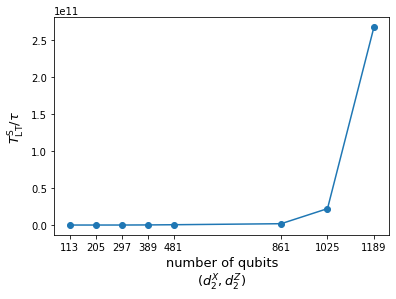

In [44]:
cd_list_s =[[3,3],[3,5],[3,7],[3,9],[3,11],[5,11],[5,13],[5,15]]
#cd_list_s =[[3,3],[3,5],[3,7],[3,9],[3,11],[5,11]]
lifetime_list_s = np.array([])
number_list_s = np.array([])
def qubits_number(d1,dx,dz):
    return dx + dz - 1 + (2*d1 -1)*(2*dx*dz-dx-dz)
for cd in cd_list_s:
    a = (4*5+6)*cd[0] /pL_X_5_1(cd[0])[0]
    b = (4*5+6)*cd[1] /pL_Z_5_1(cd[1])[0]
    lifetime_list_s = np.append(lifetime_list_s,min(a,b))
    number_list_s = np.append(number_list_s,qubits_number(5,cd[0],cd[1]))
print(number_list_s)
print(lifetime_list_s)
fig, ax = plt.subplots()
ax.plot(number_list_s, lifetime_list_s,marker='o')
ax.set_xlabel(r"number of qubits"+"\n"+r"$(d^{X}_{2},d^{Z}_{2})$", fontsize=13)
ax.set_ylabel(r'$T_{\mathrm{LT}}^{\mathrm{S}}/\tau$', fontsize=13)
ax.set_xticks(number_list_s)
ax.set_xticklabels([r"$113$"+"\n"+r"$(3,3)$",r"$205$"+"\n"+r"$(3,5)$",r"$297$"+"\n"+r"$(3,7)$",
                    r"$389$"+"\n"+r"$(3,9)$",r"$481$"+"\n"+r"$(3,11)$",r"$861$"+"\n"+r"$(5,11)$",
                    r"$1025$"+"\n"+r"$(5,13)$",r"$1189$"+"\n"+r"$(5,15)$",r"$1713$"+"\n"+r"$(7,15)$",
                    r"$1949$"+"\n"+r"$(7,17)$"
                    ])
ax.set_yscale("log")
#ax.set_xlim(2.6, 11.4)
#ax.legend()
plt.show()

[137. 245. 409. 589. 825.]


ValueError: The number of FixedLocator locations (8), usually from a call to set_ticks, does not match the number of ticklabels (6).

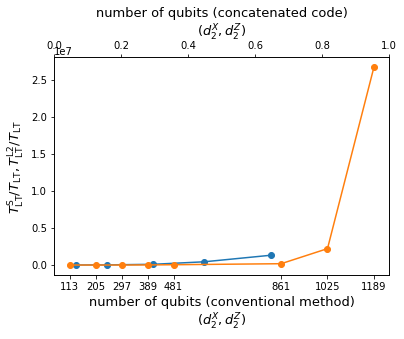

In [45]:
fig, ax = plt.subplots()
ax2 = ax.twiny()
# 連接符号
cd_list =[[3,3],[5,3],[5,5],[7,5],[7,7]]
lifetime_list = np.array([68352272.72727273,213116197,1011308411.2149509,4370172413,13220999999.999994])
number_list = np.array([])
def qubits_number(d1,dx,dz):
    return dz*(2*dx-1)*(2*d1 -1) + dz-1
for cd in cd_list:
    number_list = np.append(number_list,qubits_number(5,cd[0],cd[1]))
print(number_list)
ax.plot(number_list, lifetime_list/10000,marker='o',label="concatenated code")
# 表面符号
ax.plot(number_list_s, lifetime_list_s/10000,marker='o',label="conventional method")

# 連接符号
ax.set_xlabel(r"number of qubits (conventional method)"+"\n"+r"$(d^{X}_{2},d^{Z}_{2})$", fontsize=13)
ax2.set_xlabel(r"number of qubits (concatenated code)"+"\n"+r"$(d^{X}_{2},d^{Z}_{2})$", fontsize=13)
ax.set_ylabel(r'$T_{\mathrm{LT}}^{\mathrm{S}}/T_{\mathrm{LT}}, T_{\mathrm{LT}}^{\mathrm{L2}}/T_{\mathrm{LT}}$', fontsize=13)
# 表面符号
ax.set_xticks(number_list_s)
ax.set_xticklabels([r"$113$"+"\n"+r"$(3,3)$",r"$205$"+"\n"+r"$(3,5)$",r"$297$"+"\n"+r"$(3,7)$",
                    r"$389$"+"\n"+r"$(3,9)$",r"$481$"+"\n"+r"$(3,11)$",r"$861$"+"\n"+r"$(5,11)$"
                    ])
# 連接符号
ax2.set_xticks(number_list)
ax2.set_xticklabels([r"$137$"+"\n"+r"$(3,3)$",r"$229$"+"\n"+r"$(3,5)$",r"$409$"+"\n"+r"$(5,5)$",r"$573$"+"\n"+r"$(5,7)$",r"$825$"+"\n"+r"$(7,7)$"])
ax.set_yscale("log")
ax.set_xlim(70,900)
ax2.set_xlim(70,900)
ax.legend()
plt.show()

[137. 245. 409. 589. 825.]


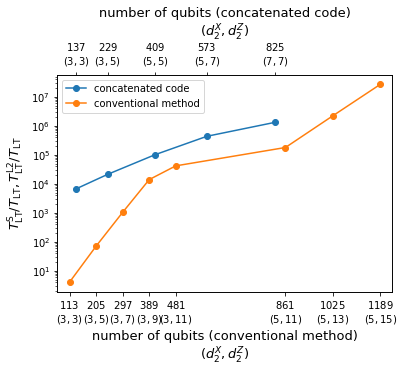

In [51]:
fig, ax = plt.subplots()
ax2 = ax.twiny()
# 連接符号
cd_list =[[3,3],[5,3],[5,5],[7,5],[7,7]]
lifetime_list = np.array([68352272.72727273,213116197,1011308411.2149509,4370172413,13220999999.999994])
number_list = np.array([])
def qubits_number(d1,dx,dz):
    return dz*(2*dx-1)*(2*d1 -1) + dz-1
for cd in cd_list:
    number_list = np.append(number_list,qubits_number(5,cd[0],cd[1]))
print(number_list)
ax.plot(number_list, lifetime_list/10000,marker='o',label="concatenated code")
# 表面符号
ax.plot(number_list_s, lifetime_list_s/10000,marker='o',label="conventional method")

# 連接符号
ax.set_xlabel(r"number of qubits (conventional method)"+"\n"+r"$(d^{X}_{2},d^{Z}_{2})$", fontsize=13)
ax2.set_xlabel(r"number of qubits (concatenated code)"+"\n"+r"$(d^{X}_{2},d^{Z}_{2})$", fontsize=13)
ax.set_ylabel(r'$T_{\mathrm{LT}}^{\mathrm{S}}/T_{\mathrm{LT}}, T_{\mathrm{LT}}^{\mathrm{L2}}/T_{\mathrm{LT}}$', fontsize=13)
# 表面符号
ax.set_xticks(number_list_s)
ax.set_xticklabels([r"$113$"+"\n"+r"$(3,3)$",r"$205$"+"\n"+r"$(3,5)$",r"$297$"+"\n"+r"$(3,7)$",
                    r"$389$"+"\n"+r"$(3,9)$",r"$481$"+"\n"+r"$(3,11)$",r"$861$"+"\n"+r"$(5,11)$",
                    r"$1025$"+"\n"+r"$(5,13)$",r"$1189$"+"\n"+r"$(5,15)$"
                    ])
# 連接符号
ax2.set_xticks(number_list)
ax2.set_xticklabels([r"$137$"+"\n"+r"$(3,3)$",r"$229$"+"\n"+r"$(3,5)$",r"$409$"+"\n"+r"$(5,5)$",r"$573$"+"\n"+r"$(5,7)$",r"$825$"+"\n"+r"$(7,7)$"])
ax.set_yscale("log")
ax.set_xlim(70,1230)
ax2.set_xlim(70,1230)
ax.legend()
plt.show()

[1.41339169e-06 3.80240598e-09 1.02295007e-11 2.75201239e-14
 7.40365778e-17 1.99178422e-19]


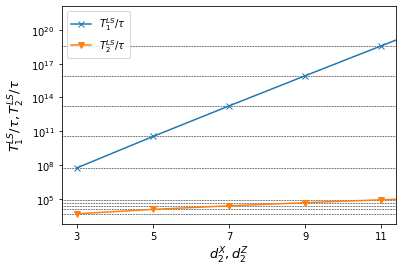

In [158]:
fig, ax = plt.subplots()
code_distance_list = np.array([3,5,7,9,11,13])
cm = plt.get_cmap("tab10")
print(pL_X_5_5(code_distance_list))
ax.plot(code_distance_list, (4*5+6)*code_distance_list /pL_X_5_5(code_distance_list),marker='x',label=r"$T^{LS}_1/\tau$")
ax.plot(code_distance_list, (4*5+6)*code_distance_list /pL_Z_5_5(code_distance_list),marker='v',label=r"$T^{LS}_2/\tau$")
for i in range(len(code_distance_list)-1):
    plt.hlines([(4*5+6)*code_distance_list[i] /pL_X_5_5(code_distance_list[i])[0]], 0, 12, "k", linestyles='dashed',linewidth=0.5)
    plt.hlines([(4*5+6)*code_distance_list[i] /pL_Z_5_5(code_distance_list[i])[0]], 0, 12, "k", linestyles='dashed',linewidth=0.5)
ax.set_xlabel(r"$d_2^X, d_2^Z$", fontsize=13)
ax.set_ylabel(r'$T^{LS}_1/\tau, T^{LS}_2/\tau$', fontsize=13)
ax.set_xticks(code_distance_list)
ax.set_yscale("log")
ax.set_xlim(2.6, 11.4)
ax.legend()
plt.show()

[113. 205. 297. 389. 481. 573. 665. 757. 849.]
[  4599.50046849  11365.48932181  23590.92094099  44969.50279613
  81488.62368445 142782.95677176 244260.36353595 410430.2693994
 680100.01352291]


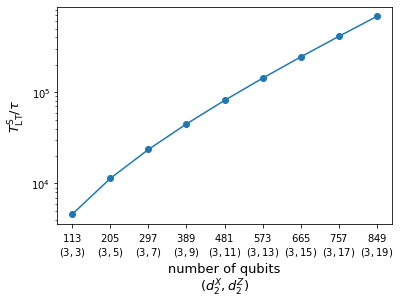

In [159]:
cd_list =[[3,3],[3,5],[3,7],[3,9],[3,11],[3,13],[3,15],[3,17],[3,19]]
lifetime_list_s = np.array([])
number_list_s = np.array([])
def qubits_number(d1,dx,dz):
    return dx + dz - 1 + (2*d1 -1)*(2*dx*dz-dx-dz)
for cd in cd_list:
    a = (4*5+6)*cd[0] /pL_X_5_5(cd[0])[0]
    b = (4*5+6)*cd[1] /pL_Z_5_5(cd[1])[0]
    lifetime_list_s = np.append(lifetime_list_s,min(a,b))
    number_list_s = np.append(number_list_s,qubits_number(5,cd[0],cd[1]))
print(number_list_s)
print(lifetime_list_s)
fig, ax = plt.subplots()
ax.plot(number_list_s, lifetime_list_s,marker='o')
ax.set_xlabel(r"number of qubits"+"\n"+r"$(d^{X}_{2},d^{Z}_{2})$", fontsize=13)
ax.set_ylabel(r'$T_{\mathrm{LT}}^{\mathrm{S}}/\tau$', fontsize=13)
ax.set_xticks(number_list_s)
ax.set_xticklabels([r"$113$"+"\n"+r"$(3,3)$",r"$205$"+"\n"+r"$(3,5)$",r"$297$"+"\n"+r"$(3,7)$",
                    r"$389$"+"\n"+r"$(3,9)$",r"$481$"+"\n"+r"$(3,11)$",r"$573$"+"\n"+r"$(3,13)$",
                    r"$665$"+"\n"+r"$(3,15)$",r"$757$"+"\n"+r"$(3,17)$",r"$849$"+"\n"+r"$(3,19)$"
                    ])
ax.set_yscale("log")
#ax.set_xlim(2.6, 11.4)
#ax.legend()
plt.show()

[137. 245. 409. 589. 825.]


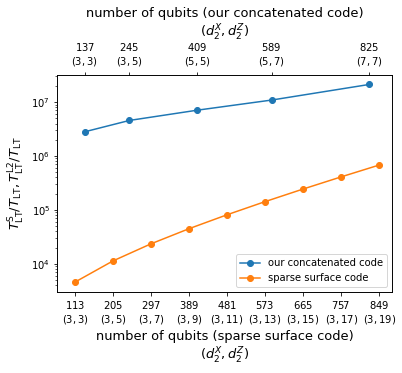

In [160]:
fig, ax = plt.subplots()
ax2 = ax.twiny()
# 連接符号
cd_list =[[3,3],[5,3],[5,5],[7,5],[7,7]]
lifetime_list = np.array([2816013.185288019,4565547.81507287,7067039.10614532,10892729.922279881,21182650.49210394])
number_list = np.array([])
def qubits_number(d1,dx,dz):
    return dz*(2*dx-1)*(2*d1 -1) + dz-1
for cd in cd_list:
    number_list = np.append(number_list,qubits_number(5,cd[0],cd[1]))
print(number_list)
ax.plot(number_list, lifetime_list,marker='o',label="our concatenated code")
# 表面符号
ax.plot(number_list_s, lifetime_list_s,marker='o',label="sparse surface code")

ax.set_xlabel(r"number of qubits (sparse surface code)"+"\n"+r"$(d^{X}_{2},d^{Z}_{2})$", fontsize=13)
ax2.set_xlabel(r"number of qubits (our concatenated code)"+"\n"+r"$(d^{X}_{2},d^{Z}_{2})$", fontsize=13)
ax.set_ylabel(r'$T_{\mathrm{LT}}^{\mathrm{S}}/T_{\mathrm{LT}}, T_{\mathrm{LT}}^{\mathrm{L2}}/T_{\mathrm{LT}}$', fontsize=13)
# 表面符号
ax.set_xticks(number_list_s)
ax.set_xticklabels([r"$113$"+"\n"+r"$(3,3)$",r"$205$"+"\n"+r"$(3,5)$",r"$297$"+"\n"+r"$(3,7)$",
                    r"$389$"+"\n"+r"$(3,9)$",r"$481$"+"\n"+r"$(3,11)$",r"$573$"+"\n"+r"$(3,13)$",
                    r"$665$"+"\n"+r"$(3,15)$",r"$757$"+"\n"+r"$(3,17)$",r"$849$"+"\n"+r"$(3,19)$"
                    ])
# 連接符号
ax2.set_xticks(number_list)
ax2.set_xticklabels([r"$137$"+"\n"+r"$(3,3)$",r"$245$"+"\n"+r"$(3,5)$",r"$409$"+"\n"+r"$(5,5)$",
                     r"$589$"+"\n"+r"$(5,7)$",r"$825$"+"\n"+r"$(7,7)$"])
ax.set_yscale("log")
ax.set_xlim(70,880)
ax2.set_xlim(70,880)
ax.legend()
plt.show()